In [1]:
import pandas as pd

In [2]:
from dataclasses import dataclass

In [3]:
links = pd.read_csv('accident_links.csv')

In [4]:
cars = pd.read_csv('carr_accident_nodes.csv')

In [5]:
trains = pd.read_csv('train_accident_nodes.csv')

In [6]:
@dataclass(frozen=True,eq=True)
class Site:
    train_id : int
    car_id: int
    time_train_acc : pd.datetime
    time_car_acc : pd.datetime
    longitude_train_acc : float
    latitude_train_acc : float
    longitude_car_acc : float
    latitude_car_acc : float
        
    track_type : str
    track_class : str
    signaled_crossing_warning : str
    roadway_condition : str
    crossing_warning_location : str
    crossing_illuminated : str
    view_obstruction : str
        
    severity : int
    number: float
    city : str
    county : str
    state : str
    temperature : float
    wind_chill : float
    humidity : float
    pressure : float
    visibility : float
    wind_direction : float
    wind_speed : float
    precipitation : float
    weather_condition : str
    bump : bool
    crossing : bool
    give_way : bool
    Junction : bool
    no_exit : bool
    roundabout : bool
    station : bool
    stop : bool
    traffic_calming : bool
    traffic_signal : bool
    turning_loop : bool
    sunrise_sunset : bool
    civil_twilight : bool
    nautical_twilight : bool
    astronomical_twilight : bool
        
    
    
@dataclass(frozen=True,eq=True)
class Train:
    train_id: int
    maintenance_incident_year : int
    maintenance_incident_month : int
    vehicle_speed : int
    vehicle_direction : str
    highway_user_position : str
    railroad_car_unit_position : int
    equipment_type : str
    nr_locomotives : int
    nr_rail_cars : int
    train_speed : int
    train_direction : str
    user_age : int
    user_gender : str
    highway_user_action : str
    train_damage_cost : int
    nr_vehicle_occupants : int
        
    #def __repr__(self):
    #    return f'train {self.train_id}'

    
    
@dataclass(frozen=True,eq=True)
class Car:
    car_id : int
    distance : float
    #def __repr__(self):
    #    return f'car {self.car_id}'

<ipython-input-6-a6126241bfe0>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  time_train_acc : pd.datetime
<ipython-input-6-a6126241bfe0>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  time_car_acc : pd.datetime


In [7]:
Sites = []

for _, (i, j) in links[['Car','Train']].iterrows():
    curr_car = cars[cars['Unnamed: 0']==j]
    curr_train = trains[trains['Unnamed: 0']==i]

    Sites.append(
               Site(curr_train['Unnamed: 0'].values[0],
                    curr_car['Unnamed: 0'].values[0],
                    curr_train['index_Time'].values[0],
                    curr_car['index_Time'].values[0],
                    curr_train['Longitude'].values[0],
                    curr_train['Latitude'].values[0],
                    curr_car['Start_Lng'].values[0],
                    curr_car['Start_Lat'].values[0],
                    curr_train['Track Type'].values[0],
                    curr_train['Track Class'].values[0],
                    curr_train['Signaled Crossing Warning'].values[0],
                    curr_train['Roadway Condition'].values[0],
                    curr_train['Crossing Warning Location'].values[0],
                    curr_train['Crossing Illuminated'].values[0],
                    curr_train['View Obstruction'].values[0],
                    curr_car['Severity'].values[0],
                    curr_car['number'].values[0],
                    curr_car['City'].values[0],
                    curr_car['County'].values[0],
                    curr_car['State'].values[0],
                    curr_car['Temperature(F)'].values[0],
                    curr_car['Wind_Chill(F)'].values[0],
                    curr_car['Humidity(%)'].values[0],
                    curr_car['Pressure(in)'].values[0],
                    curr_car['Visibility(mi)'].values[0],
                    curr_car['Wind_Direction'].values[0],
                    curr_car['Wind_Speed(mph)'].values[0],
                    curr_car['Precipitation(in)'].values[0],
                    curr_car['Weather_Condition'].values[0],
                    curr_car['Bump'].values[0],
                    curr_car['Crossing'].values[0],
                    curr_car['Give_Way'].values[0],
                    curr_car['Junction'].values[0],
                    curr_car['No_Exit'].values[0],
                    curr_car['Roundabout'].values[0],
                    curr_car['Station'].values[0],
                    curr_car['Stop'].values[0],
                    curr_car['Traffic_Calming'].values[0],
                    curr_car['Traffic_Signal'].values[0],
                    curr_car['Turning_Loop'].values[0],
                    curr_car['Sunrise_Sunset'].values[0],
                    curr_car['Civil_Twilight'].values[0],
                    curr_car['Nautical_Twilight'].values[0],
                    curr_car['Astronomical_Twilight'].values[0],
                   ),
    )


In [8]:
car_nodes = []
for _, row in cars.iterrows():
    car_nodes.append(Car(row['Unnamed: 0'],
                        row['Distance(mi)']))
train_nodes = []
for _, row in trains.iterrows():
    train_nodes.append(Train(row['Unnamed: 0'],
                             row['Maintenance Incident Year'],
                             row['Maintenance Incident Month'],
                             row['Estimated Vehicle Speed'],
                             row['Vehicle Direction'],
                             row['Highway User Position'],
                             row['Railroad Car Unit Position'],
                             row['Equipment Type'],
                             row['Number of Locomotive Units'],
                             row['Number of Cars'],
                             row['Train Speed'],
                             row['Train Direction'],
                             row['User Age'],
                             row['User Gender'],
                             row['Highway User Action'],
                             row['Vehicle Damage Cost'],
                             row['Number Vehicle Occupants'],                                               
                            ))

In [9]:
kg = []

for train in train_nodes:
    subsites = [site for site in Sites if train.train_id == site.train_id]
    for s in subsites:
        subcars = [car for car in car_nodes if car.car_id == s.car_id]
        for c in subcars:
            kg.append((train, s, c))
    


In [10]:
graph = pd.DataFrame(kg, columns=['train','accident', 'car'])

In [18]:
len(graph['accident'].unique())

1873

In [20]:
graph['train'][0]

train 69

In [11]:
import networkx

In [12]:
netgraph = networkx.from_pandas_edgelist(graph, source='train', target='car')

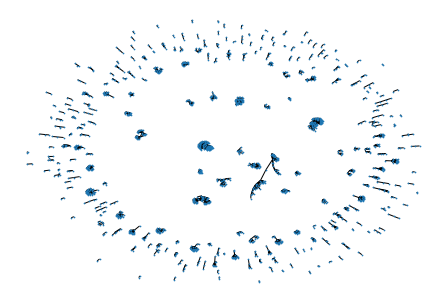

In [13]:
networkx.draw(netgraph, node_size=0.5)

In [34]:
graph['train'][i].train_id

69

In [44]:
a = 0
for i in range(len(graph)):
    if graph['car'][i].number == graph['train'][i].vehicle_speed:
        a+=1
a

0

In [47]:
graph['accident'][0]

Site(train_id=69, car_id=1880506, time_train_acc='2020-11-23 12:00:00', time_car_acc='2020-11-23 21:12:00', longitude_train_acc=-86.73075925, latitude_train_acc=31.60730732, longitude_car_acc=-86.730775, latitude_car_acc=31.607021000000003, track_type='Main', track_class='1', signaled_crossing_warning='Provided minimum 20-second warning', roadway_condition='Dry', crossing_warning_location='Both sides', crossing_illuminated='No', view_obstruction='Not obstructed', severity=4, city='Georgiana', county='Butler', state='AL', temperature=42.0, wind_chill=38.0, humidity=73.0, pressure=29.72, visibility=10.0, wind_direction='N', wind_speed=6.0, precipitation=0.0, weather_condition='Fair', bump=False, crossing=True, give_way=False, Junction=False, no_exit=False, roundabout=False, station=False, stop=False, traffic_calming=False, traffic_signal=False, turning_loop=False, sunrise_sunset='Night', civil_twilight='Night', nautical_twilight='Night', astronomical_twilight='Night')

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

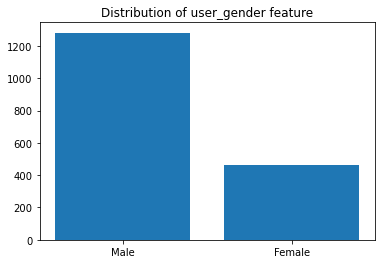

In [48]:
ages = []
for i in range(len(graph)):
    ages.append(graph['train'][i].user_gender)
#sns.histplot(ages, bins=50)
plt.bar(['Male','Female'],pd.Series(ages).value_counts())
plt.title('Distribution of user_gender feature')
plt.savefig('barm.png',dpi=500)

In [113]:
ages =[]
for i in range(len(graph)):
    ages.append(graph['accident'][i].astronomical_twilight)
u = pd.Series(ages)
1-len(u.dropna())/len(u)

0.0

In [56]:
1-len(u.dropna())/len(u)

0.06780565936999461

In [67]:
1-0.0074746396155899175


0.9925253603844101

In [15]:
df = pd.DataFrame(pd.Series([a.state for a in graph['accident']]).value_counts())
df['index'] = df.index
df

,0,index
IL,447,IL
CA,414,CA
NC,143,NC
WA,132,WA
FL,128,FL
OR,116,OR
AZ,109,AZ
NJ,102,NJ
TX,42,TX
GA,35,GA


In [64]:
!pip install GDAL-3.4.3-cp38-cp38-win_amd64.whl

Processing c:\users\niels\documents\knowledge engineering\gdal-3.4.3-cp38-cp38-win_amd64.whl


In [65]:
!pip install Fiona-1.8.21-cp38-cp38-win_amd64.whl

Processing c:\users\niels\documents\knowledge engineering\fiona-1.8.21-cp38-cp38-win_amd64.whl


In [63]:
from platform import python_version

print(python_version())

3.8.8


In [66]:
#!conda install -c conda-forge geopandas
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)


In [16]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

C:\Users\niels\anaconda3\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [17]:
usa = gpd.read_file(r"C:\Users\niels\Documents\knowledge engineering\cb_2018_us_state_5m\cb_2018_us_state_5m.shp")

In [18]:
stats = pd.read_csv('Data with nice statistics.csv')

stats['Accidents per Railway Mile x million Inhabitants'] =  stats['Accidents']/stats['Railway Miles']*(stats['Inhabitants']/1000000)
stats['gdp/capita 2021'] = [85546,74052,62077,62867,86265,56301, 72524, 56511,67235, 63271, 55213,59969,72597,51861,66011,64751,
                           93463, 52031,68483,71083,56554,61760,49027,55425, 62065,80446,68849,62517,52002,49616,65530,49017,47770  ]
stats['Accidents/gdp (thousands of dollars)'] = stats['Accidents']/(stats['gdp/capita 2021']/1000)

In [19]:
usa['State'] = usa['STUSPS']

In [20]:
small_us = stats.merge(usa, on='State')

In [21]:
usa

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",NE
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",WA
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",NM
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",SD
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",TX
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",CA
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...",KY
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ...",OH
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",AL
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984...",GA


In [146]:
type(usa)

geopandas.geodataframe.GeoDataFrame

In [22]:
us_data = gpd.GeoDataFrame(small_us)

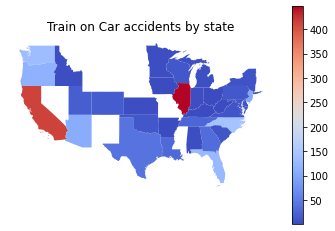

In [35]:
pl = us_data.plot(column='Accidents', cmap='coolwarm', legend=True)
pl.set_title('Train on Car accidents by state')
pl.axis('off')
pl.figure.savefig('Accidents.png',dpi=500)

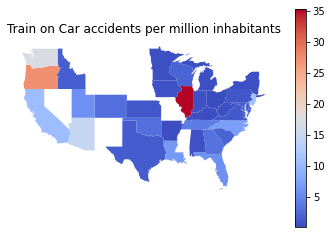

In [36]:
pl = us_data.plot(column='Accident per million inhabitants', cmap='coolwarm', legend=True)
pl.set_title('Train on Car accidents per million inhabitants')
pl.axis('off')
pl.figure.savefig('Accidents_people.png',dpi=500)

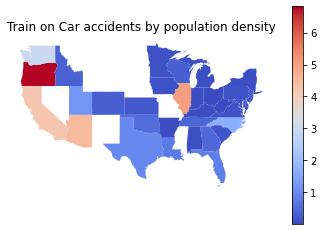

In [37]:
pl = us_data.plot(column='Accident per inhabitant per km^2', cmap='coolwarm', legend=True)
pl.set_title('Train on Car accidents by population density')
pl.axis('off')
pl.figure.savefig('Accidents_density.png',dpi=500)

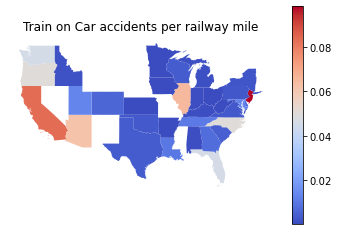

In [38]:
pl = us_data.plot(column='Accident per railway mile', cmap='coolwarm', legend=True)
pl.set_title('Train on Car accidents per railway mile')
pl.axis('off')
pl.figure.savefig('Accidents_railway.png',dpi=500)

<AxesSubplot:>

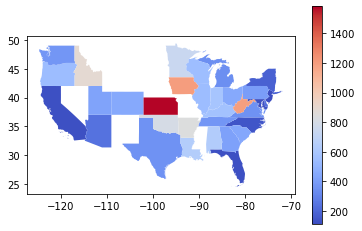

In [152]:
us_data.plot(column='Railway miles per million inhabitants', cmap='coolwarm', legend=True)


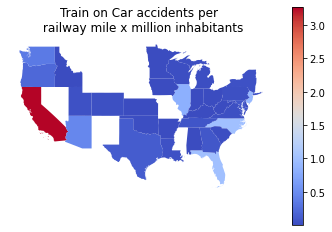

In [39]:
pl = us_data.plot(column='Accidents per Railway Mile x million Inhabitants', cmap='coolwarm', legend=True)
pl.set_title('Train on Car accidents per \n railway mile x million inhabitants')
pl.axis('off')
pl.figure.savefig('Accidents_rail_inhabitants.png',dpi=500)

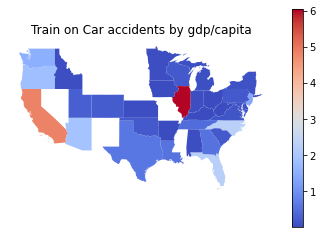

In [41]:
pl = us_data.plot(column='Accidents/gdp (thousands of dollars)', cmap='coolwarm', legend=True)
pl.set_title('Train on Car accidents by gdp/capita')
pl.axis('off')
pl.figure.savefig('Accidents_gdp.png',dpi=500)

(-127.37702199999997,
 -69.21236599999997,
 23.271492200000004,
 50.62782779999999)

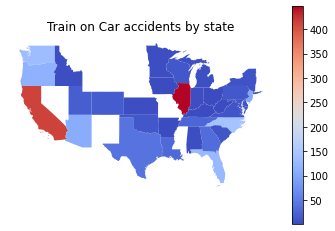

In [24]:
plot = us_data.plot(column='Accidents', cmap='coolwarm', legend=True)
plot.set_title('Train on Car accidents by state')
plot.axis('off') # labels along the bottom edge are off

In [170]:
?plt.tick_params

In [97]:
!pip install Shapely-1.8.2-cp38-cp38-win_amd64.whl 
!pip install Rtree-1.0.0-cp38-cp38-win_amd64.whl

Processing c:\users\niels\documents\knowledge engineering\shapely-1.8.2-cp38-cp38-win_amd64.whl
Shapely is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing c:\users\niels\documents\knowledge engineering\pyproj-3.2.1-cp38-cp38-win_amd64.whl
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.3.1
    Uninstalling pyproj-3.3.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\niels\\anaconda3\\lib\\site-packages\\pyproj\\database.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Processing c:\users\niels\documents\knowledge engineering\rtree-1.0.0-cp38-cp38-win_amd64.whl
  Attempting uninstall: Rtree
    Found existing installation: Rtree 0.9.7
    Uninstalling Rtree-0.9.7:
      Successfully uninstalled Rtree-0.9.7


In [98]:
!pip install pyproj-3.2.1-cp38-cp38-win_amd64.whl --user

Processing c:\users\niels\documents\knowledge engineering\pyproj-3.2.1-cp38-cp38-win_amd64.whl


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [105]:
!pip install pygeos-0.12.0-cp38-cp38-win_amd64.whl

Processing c:\users\niels\documents\knowledge engineering\pygeos-0.12.0-cp38-cp38-win_amd64.whl


In [106]:
!pip install cartopy

  Using cached Cartopy-0.20.2.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.1.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.0.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.19.0.post1.tar.gz (12.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Gett

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\niels\anaconda3\python.exe' 'C:\Users\niels\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\niels\AppData\Local\Temp\tmp874417uw'
       cwd: C:\Users\niels\AppData\Local\Temp\pip-install-c06k3b79\cartopy_919c1d822b55477690292195c20ed3e3
  Complete output (3 lines):
  setup.py:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    warnings.warn(
  Proj 8.0.0 must be installed.
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\niels\anaconda3\python.exe' 'C:\Users\niels\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\niels\AppData\Local\Temp\tmpu988bex5'
       cwd: C:\Users\niels\AppData\Local\Temp\pip-install-c06k3b79\cartopy_456b4a08a1d24a2e8e0d74096526bf97
  Complete output (3

In [100]:
!pip install geoplot --user
import geoplot

  Using cached geoplot-0.5.1-py3-none-any.whl (28 kB)
  Using cached mapclassify-2.4.3-py3-none-any.whl (38 kB)
  Using cached Cartopy-0.20.2.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.1.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.0.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.19.0.post1.tar.gz (12.1 MB)
  Installing build dependencies: started
  

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\niels\anaconda3\python.exe' 'C:\Users\niels\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\niels\AppData\Local\Temp\tmpze6wc8ws'
       cwd: C:\Users\niels\AppData\Local\Temp\pip-install-t8kdptrk\cartopy_a084936b31cf449b8873da2eb21a4db7
  Complete output (3 lines):
  setup.py:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    warnings.warn(
  Proj 8.0.0 must be installed.
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\niels\anaconda3\python.exe' 'C:\Users\niels\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\niels\AppData\Local\Temp\tmpru7u7_y5'
       cwd: C:\Users\niels\AppData\Local\Temp\pip-install-t8kdptrk\cartopy_a15e9df4720b4f858d91027d7beb4cfc
  Complete output (3

ModuleNotFoundError: No module named 'geoplot'

In [ ]:
geoplot.choropleth(
    us_data, hue='Accident', scheme=scheme,
    cmap='Greens', figsize=(8, 4)
)